# Dataset 1 - 5g-network-slicing-analysis

In [1]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = settings["DATASET"]["dataset"]
project_name = settings["RUN"]["project_name"]

INFO:root:torch is not installed


In [2]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df.drop(columns=['Non-GBR'], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data 5g-network-slicing-analysis
Num cols: 15. Num rows: 31583. Num classes: 3
Name cols: Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0',
       'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone'],
      dtype='object')
Target col: slice Type


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0,0.000001,10,1,0,0,0,0,0,0,1,0,0,0
1,18,20,0.001000,100,0,1,1,1,0,0,0,0,0,0,0
2,17,14,0.000001,300,0,1,0,0,0,0,0,0,0,0,1
3,3,17,0.010000,100,0,1,0,0,0,0,0,0,0,0,1
4,9,4,0.010000,50,1,0,0,0,0,0,0,0,1,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LTE/5g Category,31583.0,10.974923,6.053641,1.000000,6.000000,11.000,16.00,22.00
Time,31583.0,11.476459,6.915643,0.000000,6.000000,11.000,17.00,23.00
Packet Loss Rate,31583.0,0.003079,0.004344,0.000001,0.000001,0.001,0.01,0.01
Packet delay,31583.0,114.126745,106.320976,10.000000,50.000000,75.000,150.00,300.00
IoT,31583.0,0.468100,0.498989,0.000000,0.000000,0.000,1.00,1.00
LTE/5G,31583.0,0.531900,0.498989,0.000000,0.000000,1.000,1.00,1.00
GBR,31583.0,0.441187,0.496537,0.000000,0.000000,0.000,1.00,1.00
AR/VR/Gaming,31583.0,0.106291,0.308215,0.000000,0.000000,0.000,0.00,1.00
Healthcare,31583.0,0.057943,0.233639,0.000000,0.000000,0.000,0.00,1.00
Industry 4.0,31583.0,0.116107,0.320358,0.000000,0.000000,0.000,0.00,1.00


array([[<Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Packet Loss Rate'}>,
        <Axes: title={'center': 'Packet delay'}>],
       [<Axes: title={'center': 'IoT'}>,
        <Axes: title={'center': 'LTE/5G'}>,
        <Axes: title={'center': 'GBR'}>,
        <Axes: title={'center': 'AR/VR/Gaming'}>],
       [<Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Industry 4.0'}>,
        <Axes: title={'center': 'IoT Devices'}>,
        <Axes: title={'center': 'Public Safety'}>],
       [<Axes: title={'center': 'Smart City & Home'}>,
        <Axes: title={'center': 'Smart Transportation'}>,
        <Axes: title={'center': 'Smartphone'}>, <Axes: >]], dtype=object)

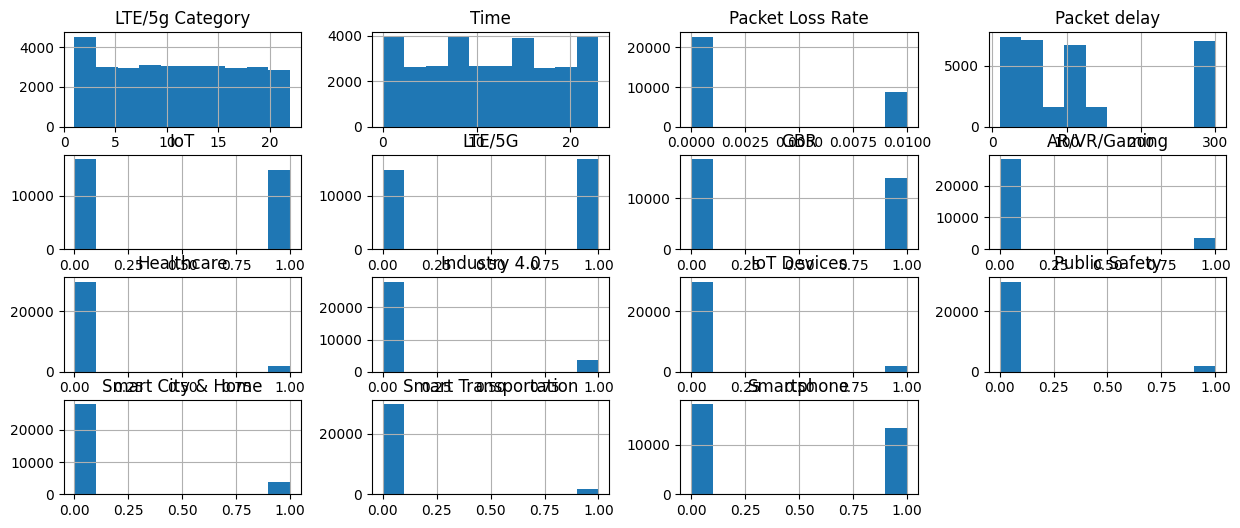

In [4]:
df.hist(figsize=(15, 6))

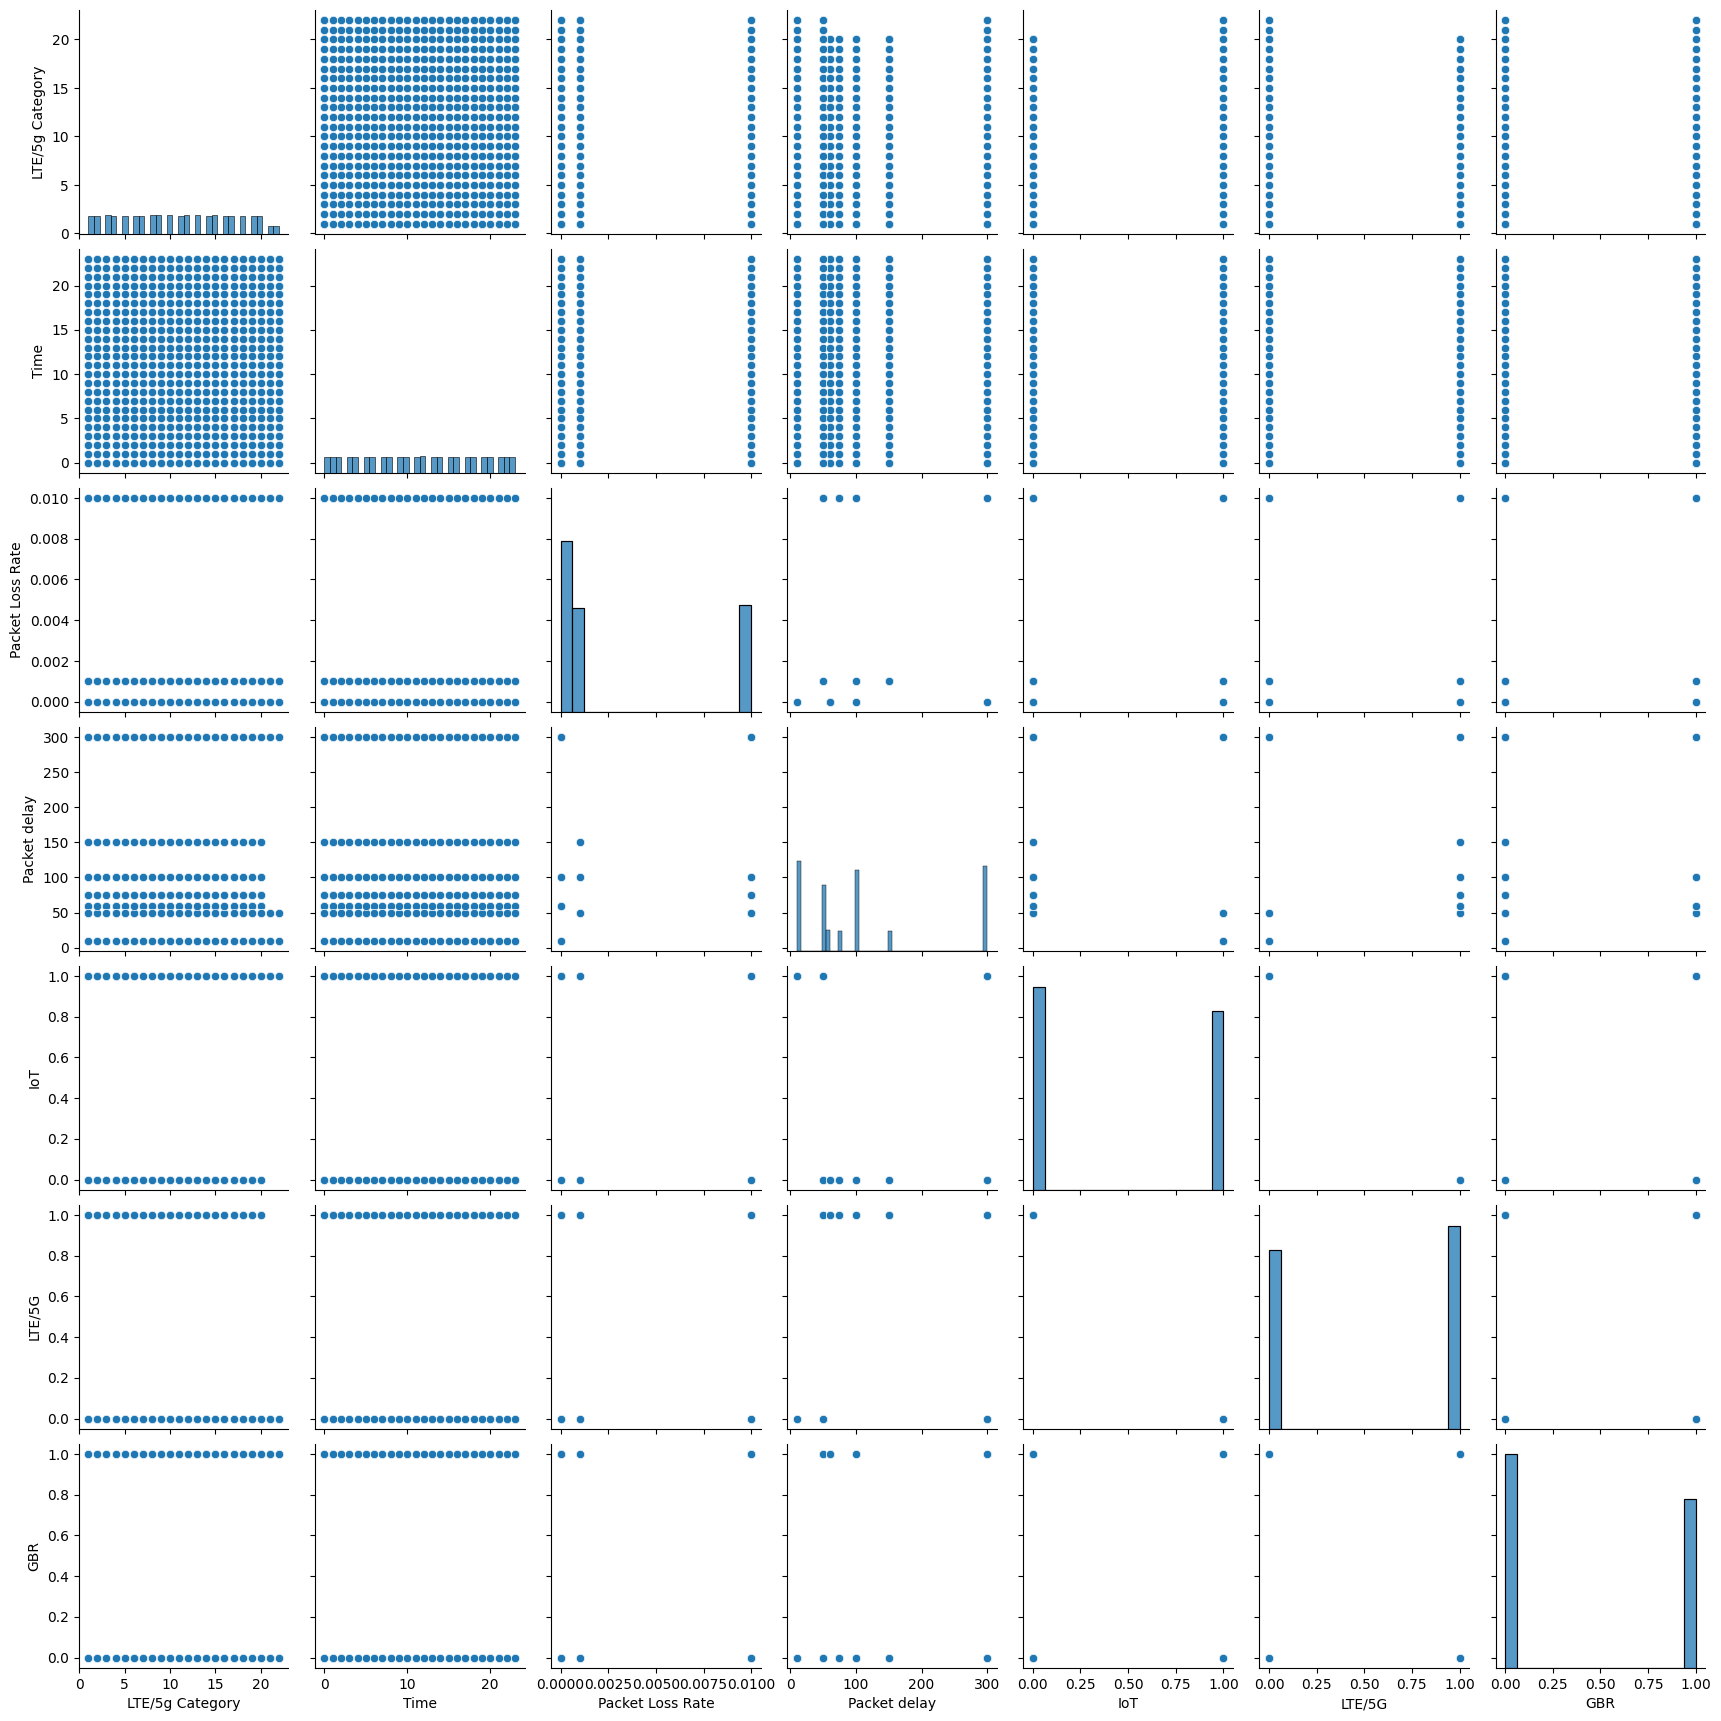

In [5]:
import seaborn as sns 

sns.pairplot(data=df[['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR']]);


In [6]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(df)

X_train = scaler.transform(df)
y_train = pd.get_dummies(target_col)


Elapsed time to compute the importances: 0.006 seconds


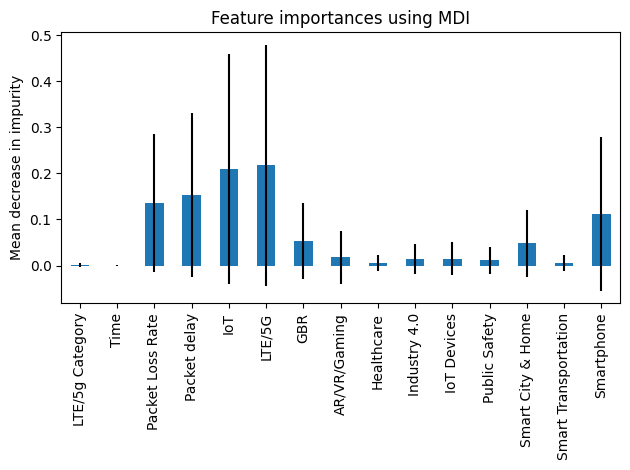

In [7]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [8]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)
 

Epoch 1/10


D:\git\github\ic\EXPLOR_network_slicing\venv\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.8663 - loss: 0.4855
Epoch 2/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 3/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 1.0000 - loss: 3.5162e-04
Epoch 4/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 1.0000 - loss: 1.3256e-04
Epoch 5/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 1.0000 - loss: 6.1090e-05
Epoch 6/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 1.0000 - loss: 3.0934e-05
Epoch 7/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 1.0000 - loss: 1.6301e-05
Epoch 8/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 1.0000 - loss: 8.9657e-06
Epoch 9/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 1.0000 - loss: 5.0278e-06
Epoch 10/10
987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 1.0000 - loss: 2.8113e-06


In [9]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 743 (2.91 KB)

 Trainable params: 247 (988.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 496 (1.94 KB)

In [10]:
# Predictions on testing data
df_test, target_col_test = preprocess("test.csv")

X_test = scaler.transform(df_test)

preds = classifier.predict(X_test)
preds.shape

987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step


(31584, 3)

# Dataset 2 - networkslicing

In [11]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "networkslicing"
project_name = settings["RUN"]["project_name"]


In [13]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_csv(datafile, index_col=0)
    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
    
    df["Use Case"]=df["Use Case"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes
    df["GBR"]=df["GBR"].astype('category').cat.codes

    #df.drop(columns=["Use Case", "Day", "Time"], inplace=True)
    return df, target_col 

df, target_col = preprocess("train.csv")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()


Run project explor for data networkslicing
Num cols: 8. Num rows: 63167. Num classes: 3
Name cols: Index(['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet delay'],
      dtype='object')
Target col: slice Type


,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay
1,7,1,1,3,1,1,0.01,100
2,7,1,1,3,2,1,0.01,100
3,7,1,1,3,3,1,0.01,100
4,7,1,1,3,4,1,0.01,100
5,7,1,1,3,5,1,0.01,100


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Use Case,63167.0,4.616984,2.560385,0.000000,2.000000,5.000,7.00,7.00
LTE/5g Category,63167.0,10.968243,6.064253,1.000000,6.000000,11.000,16.00,22.00
Technology Supported,63167.0,0.531907,0.498985,0.000000,0.000000,1.000,1.00,1.00
Day,63167.0,3.000000,2.000032,0.000000,1.000000,3.000,5.00,6.00
Time,63167.0,11.500182,6.922145,0.000000,6.000000,12.000,17.50,23.00
GBR,63167.0,0.558504,0.496569,0.000000,0.000000,1.000,1.00,1.00
Packet Loss Rate,63167.0,0.003091,0.004348,0.000001,0.000001,0.001,0.01,0.01
Packet delay,63167.0,114.308737,106.322142,10.000000,50.000000,75.000,150.00,300.00


array([[<Axes: title={'center': 'Use Case'}>,
        <Axes: title={'center': 'LTE/5g Category'}>,
        <Axes: title={'center': 'Technology Supported'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'GBR'}>],
       [<Axes: title={'center': 'Packet Loss Rate'}>,
        <Axes: title={'center': 'Packet delay'}>, <Axes: >]], dtype=object)

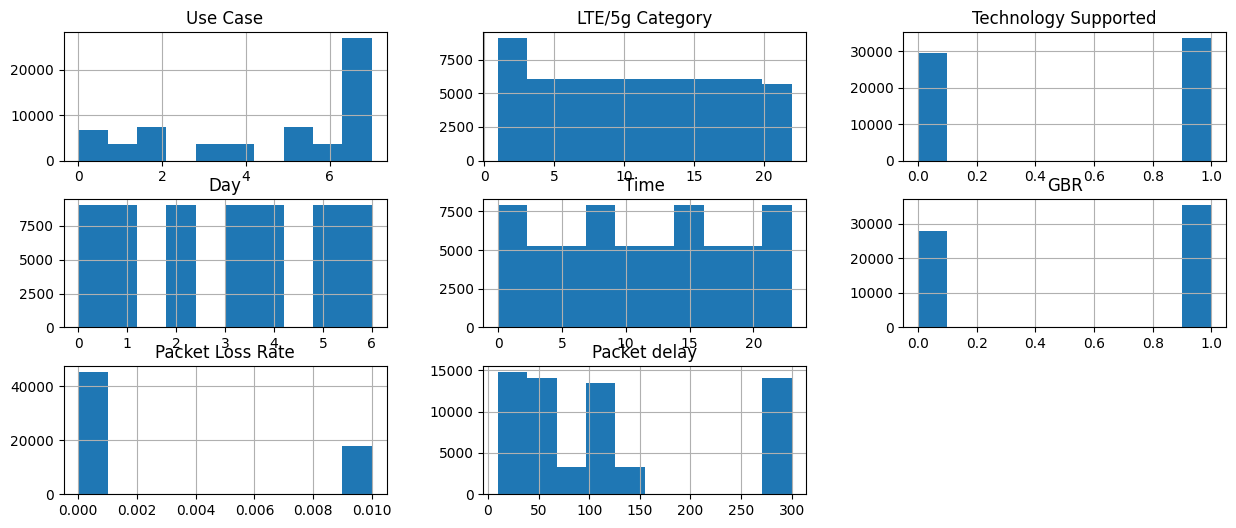

In [15]:
df.hist(figsize=(15, 6))

In [16]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

labels= pd.get_dummies(target_col)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, stratify=labels)

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# Storing the fit object for later reference
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

y_train_onehot = y_train.idxmax(axis=1)
le = LabelEncoder()
y_train_onehot = le.fit_transform(y_train_onehot)
y_test_onehot = y_test.idxmax(axis=1)
y_test_onehot = le.transform(y_test_onehot)

In [17]:
import seaborn as sns 

df_new = df.copy()
df_new['Label'] = le.transform(target_col)

df_new.corr()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,Label
Use Case,1.000000e+00,-3.365154e-02,4.092538e-01,7.907153e-15,2.447910e-05,-2.840951e-02,1.478670e-01,3.011191e-01,6.680423e-02
LTE/5g Category,-3.365154e-02,1.000000e+00,-8.225971e-02,-1.457921e-15,-4.323297e-05,1.035868e-02,1.396936e-02,-1.583651e-02,7.847951e-16
Technology Supported,4.092538e-01,-8.225971e-02,1.000000e+00,1.171573e-14,2.467278e-05,-1.256230e-01,-1.692933e-01,1.924235e-01,-4.439367e-15
Day,7.907153e-15,-1.457921e-15,1.171573e-14,1.000000e+00,7.011970e-18,-1.330768e-15,-5.822830e-16,3.357354e-15,9.615136e-16
Time,2.447910e-05,-4.323297e-05,2.467278e-05,7.011970e-18,1.000000e+00,2.338411e-05,4.178960e-05,-3.539577e-06,6.044244e-17
GBR,-2.840951e-02,1.035868e-02,-1.256230e-01,-1.330768e-15,2.338411e-05,1.000000e+00,1.355706e-02,-4.294413e-01,-5.166787e-01
Packet Loss Rate,1.478670e-01,1.396936e-02,-1.692933e-01,-5.822830e-16,4.178960e-05,1.355706e-02,1.000000e+00,3.122009e-01,6.096061e-01
Packet delay,3.011191e-01,-1.583651e-02,1.924235e-01,3.357354e-15,-3.539577e-06,-4.294413e-01,3.122009e-01,1.000000e+00,5.308839e-01
Label,6.680423e-02,7.847951e-16,-4.439367e-15,9.615136e-16,6.044244e-17,-5.166787e-01,6.096061e-01,5.308839e-01,1.000000e+00


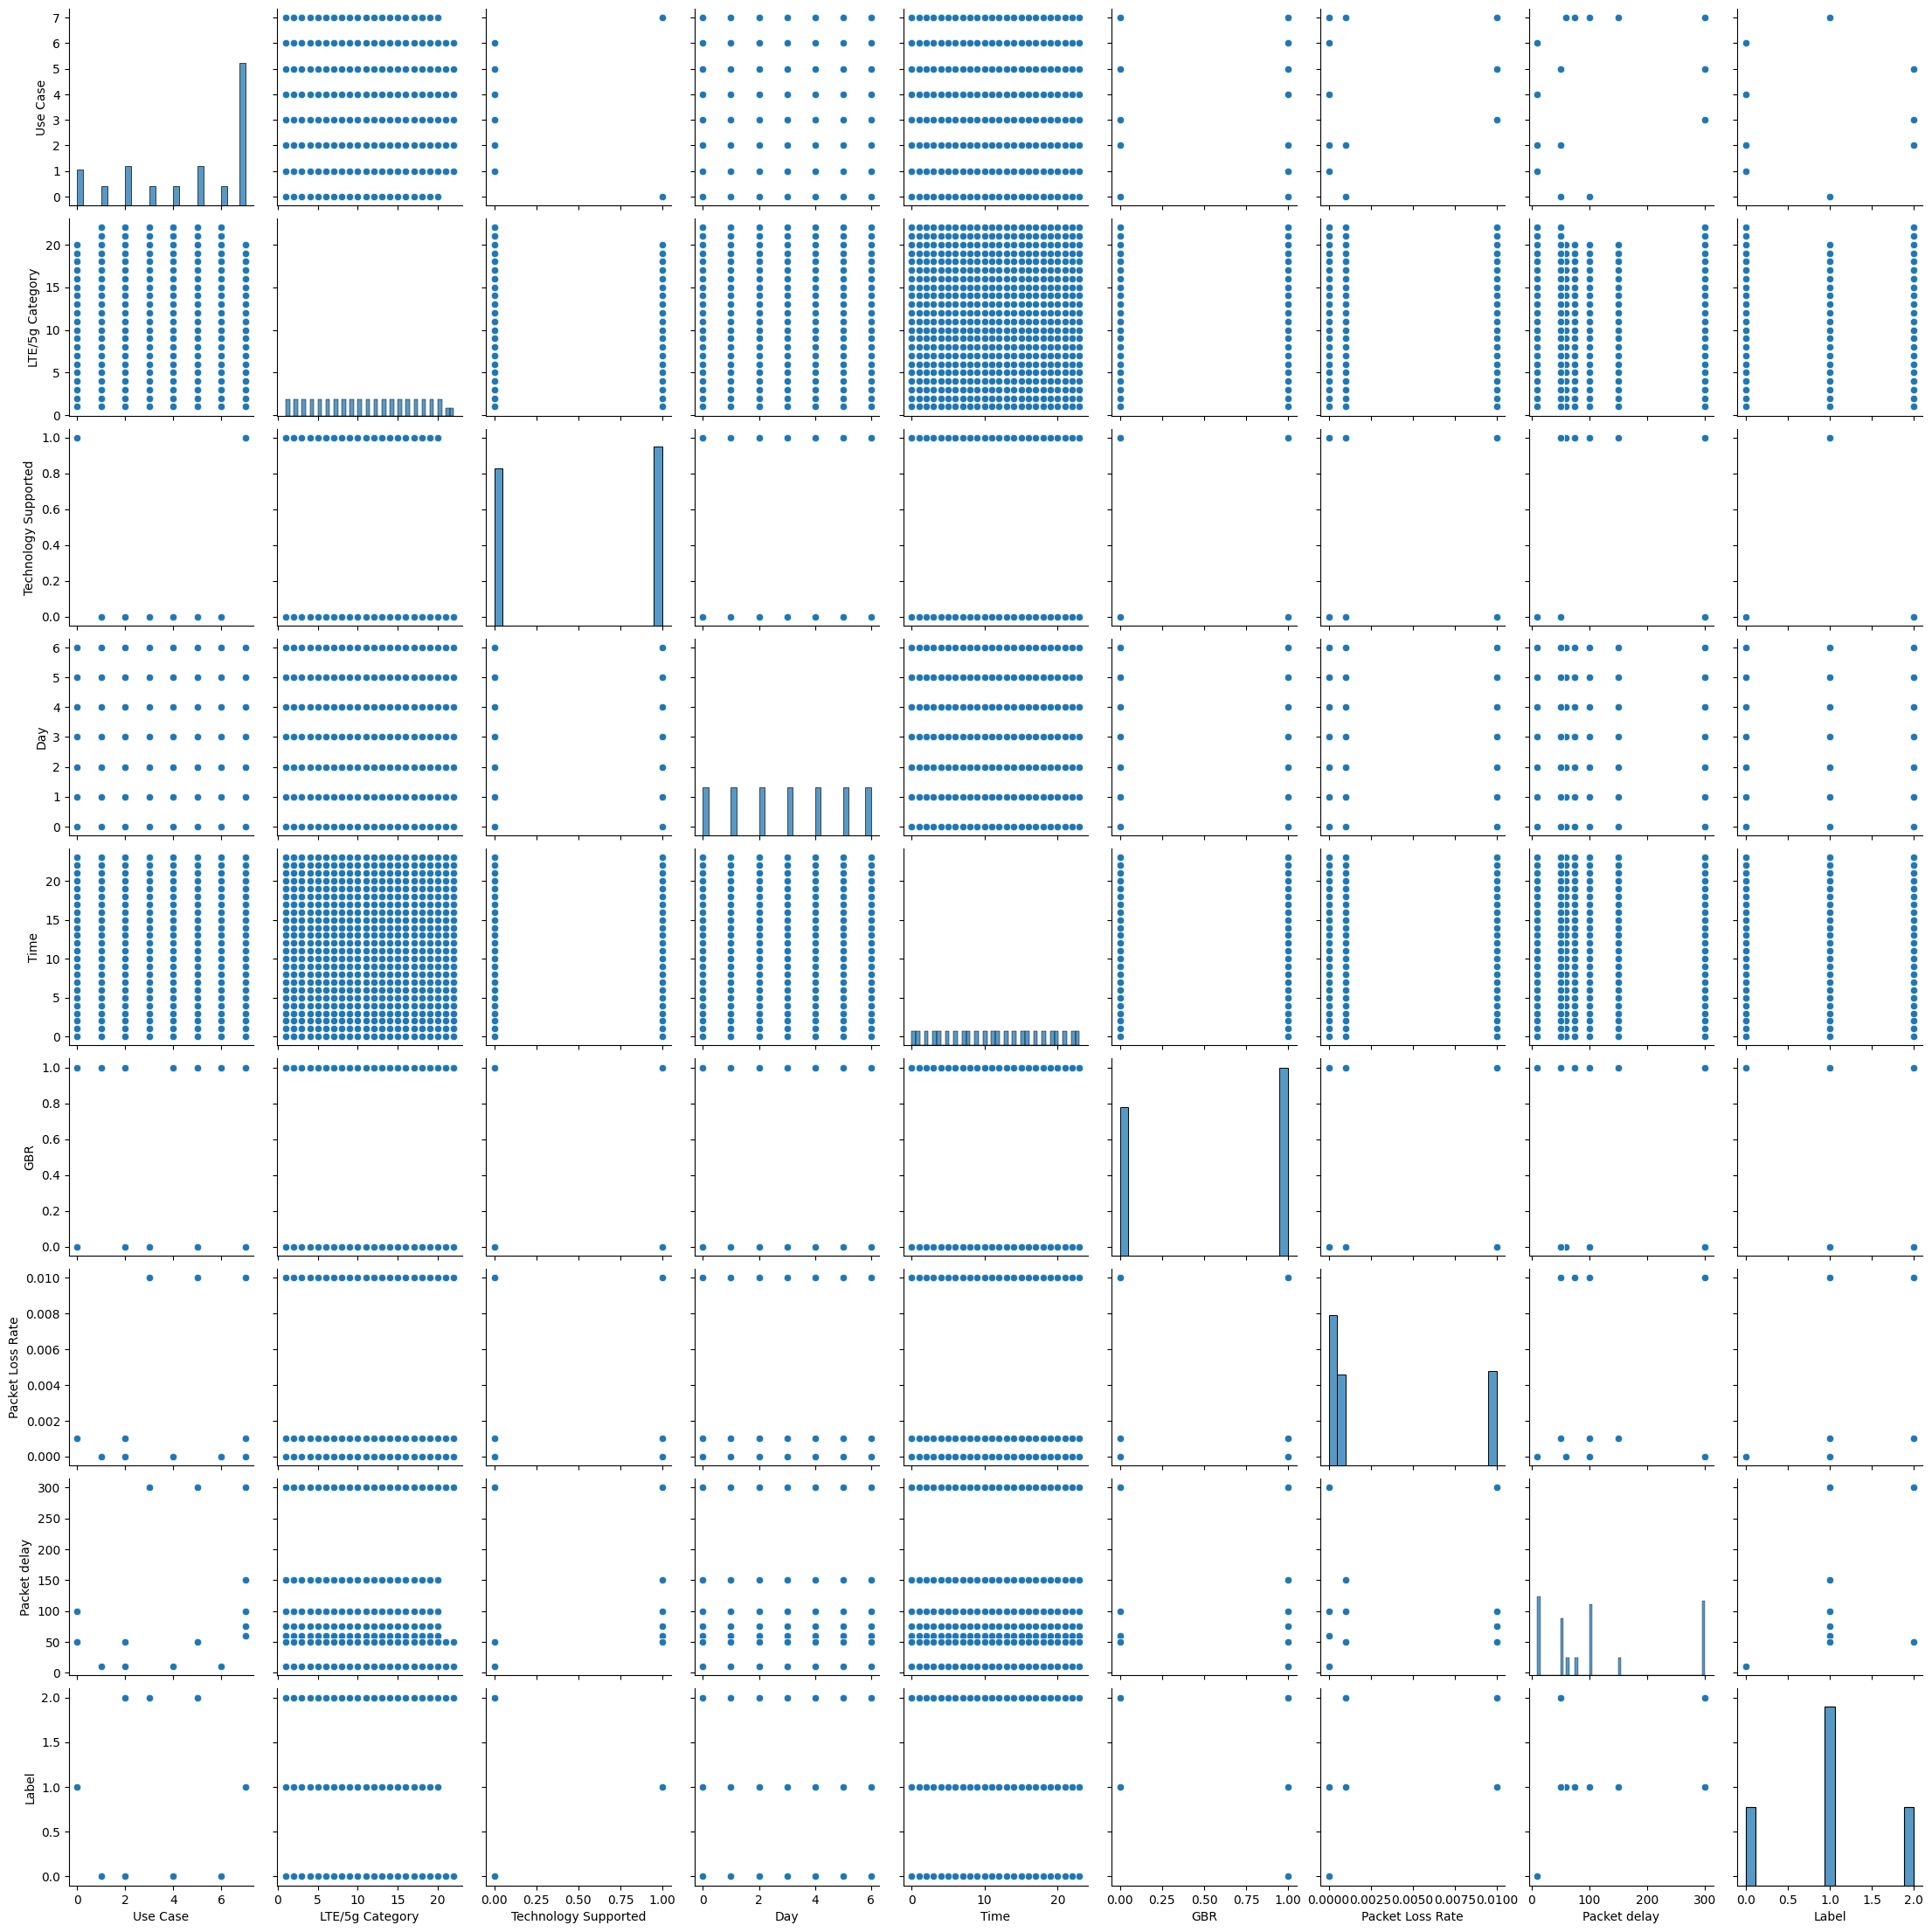

In [18]:
sns.pairplot(data=df_new)

Elapsed time to compute the importances: 0.000 seconds


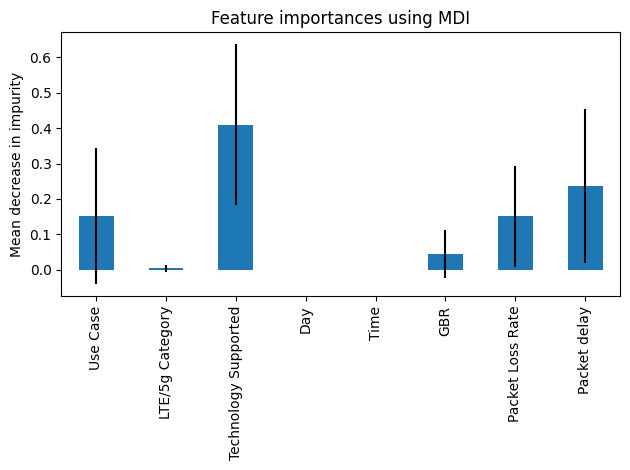

In [19]:
from sklearn.ensemble import RandomForestClassifier

feature_names = df.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

import time
import matplotlib.pyplot as plt

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train[0:300], y_train_onehot[0:300])

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [21]:
from sklearn.svm import SVC
clf.fit(X_train, y_train_onehot)

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


In [22]:
import tensorflow as tf
num_inputs = len(df.columns)
BATCH_SIZE = 32
EPOCHS = 10

classifier = tf.keras.Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(tf.keras.layers.Dense(units=10, input_dim=num_inputs, kernel_initializer='uniform', activation='relu'))
 
#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
 
# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(tf.keras.layers.Dense(units=num_classes, kernel_initializer='uniform', activation='softmax'))
 
# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
# fitting the Neural Network on the training data
history=classifier.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS, verbose=1)

Epoch 1/10


D:\git\github\ic\EXPLOR_network_slicing\venv\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1580/1580 ━━━━━━━━━━━━━━━━━━━━ 2s 592us/step - accuracy: 0.7989 - loss: 0.5144
Epoch 2/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 1.0000 - loss: 0.0461
Epoch 3/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 1.0000 - loss: 0.0145
Epoch 4/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 1.0000 - loss: 0.0059
Epoch 5/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 1.0000 - loss: 0.0026
Epoch 6/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 1.0000 - loss: 0.0012
Epoch 7/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 1.0000 - loss: 5.4992e-04
Epoch 8/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 1.0000 - loss: 2.5598e-04
Epoch 9/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 1.0000 - loss: 1.2272e-04
Epoch 10/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 1.0000 - loss: 5.8563e-05


In [23]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

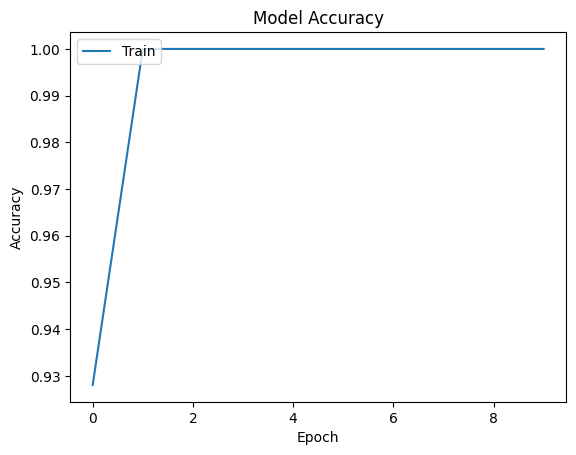

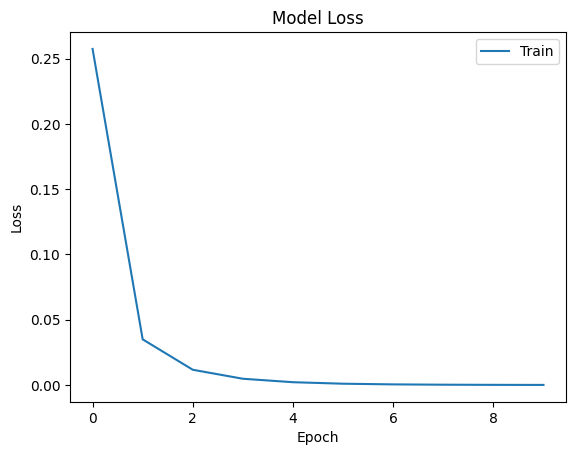

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 1.0000 - loss: 3.3921e-05

compile_metrics: 100.00%


In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))


In [25]:
y_pred = classifier.predict(X_train).argmax(axis=1)
accuracy = accuracy_score(y_train_onehot, y_pred)
print("Train Accuracy:", accuracy)

y_pred = classifier.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test_onehot, y_pred)
print("Test Accuracy:", accuracy)

1580/1580 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step
Train Accuracy: 1.0
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
Test Accuracy: 1.0


# Dataset 3 - Slice Type

In [114]:
from libs.foxutils.utils.core_utils import settings, datasets_dir
import pandas as pd 
import numpy as np 
from os.path import join as pathjoin 

dataset_name = "deep-slice"
project_name = settings["RUN"]["project_name"]

In [116]:
print(f"Run project {project_name} for data {dataset_name}")
target_name = "Slice Type"

def preprocess(filename = "train.csv"):
    datafile = pathjoin(datasets_dir, project_name, dataset_name, filename)
    df = pd.read_excel(datafile, sheet_name='Model_Inputs_Outputs', index_col=None)
    df.rename(columns={x: x.split(" (")[0] for x in df.columns}, inplace=True)

    if not (target_name in df.columns):
        target_col = None
    else:
        target_col = df[target_name]
        df.drop(columns=[target_name], inplace=True)
        
    df.drop(columns=["Unnamed: 0"], inplace=True)
    df["Use CaseType"]=df["Use CaseType"].astype('category').cat.codes
    df["Packet Delay Budget"]=df["Packet Delay Budget"].astype('category').cat.codes
    df["Technology Supported"]=df["Technology Supported"].astype('category').cat.codes
    df["LTE/5G UE Category"]=df["LTE/5G UE Category"].astype('category').cat.codes
    df["Day"]=df["Day"].astype('category').cat.codes

    return df, target_col 

df, target_col = preprocess("5G_Dataset_Network_Slicing_CRAWDAD_Shared.xlsx")

num_cols = len(df.columns)
num_rows = len(df)
num_classes = len(np.unique(target_col))

print(f"Num cols: {num_cols}. Num rows: {num_rows}. Num classes: {num_classes}")
print(f"Name cols: {df.columns}")
print(f"Target col: {target_name}")
df.head()

Run project explor for data deep-slice
Num cols: 8. Num rows: 466739. Num classes: 3
Name cols: Index(['Use CaseType', 'LTE/5G UE Category', 'Technology Supported', 'Day',
       'Time', 'QCI', 'Packet Loss Rate', 'Packet Delay Budget'],
      dtype='object')
Target col: Slice Type


,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [117]:
df.head()

,Use CaseType,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
0,7,1,1,1,1,1,0.01,2
1,7,1,1,1,1,2,0.01,2
2,7,1,1,1,1,3,0.01,2
3,7,1,1,1,1,4,0.01,2
4,7,1,1,1,1,65,0.01,2


In [118]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'D:\\git\\github\\ic\\EXPLOR_network_slicing\\utils\\__init__.py'>



Describing pandas dataframe
                         count       mean        std       min       25%  \
Use CaseType          373391.0   3.356961   2.479814  0.000000  1.000000   
LTE/5G UE Category    373391.0  10.556904   5.865314  0.000000  5.000000   
Technology Supported  373391.0   0.358836   0.479660  0.000000  0.000000   
Day                   373391.0   3.002009   1.997834  0.000000  1.000000   
Time                  373391.0  11.995610   6.637567  1.000000  6.000000   
QCI                   373391.0  24.227325  28.948251  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003990   0.004643  0.000001  0.000001   
Packet Delay Budget   373391.0   0.910209   0.893940  0.000000  0.000000   

                         50%    75%    max  
Use CaseType           3.000   6.00   7.00  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI            

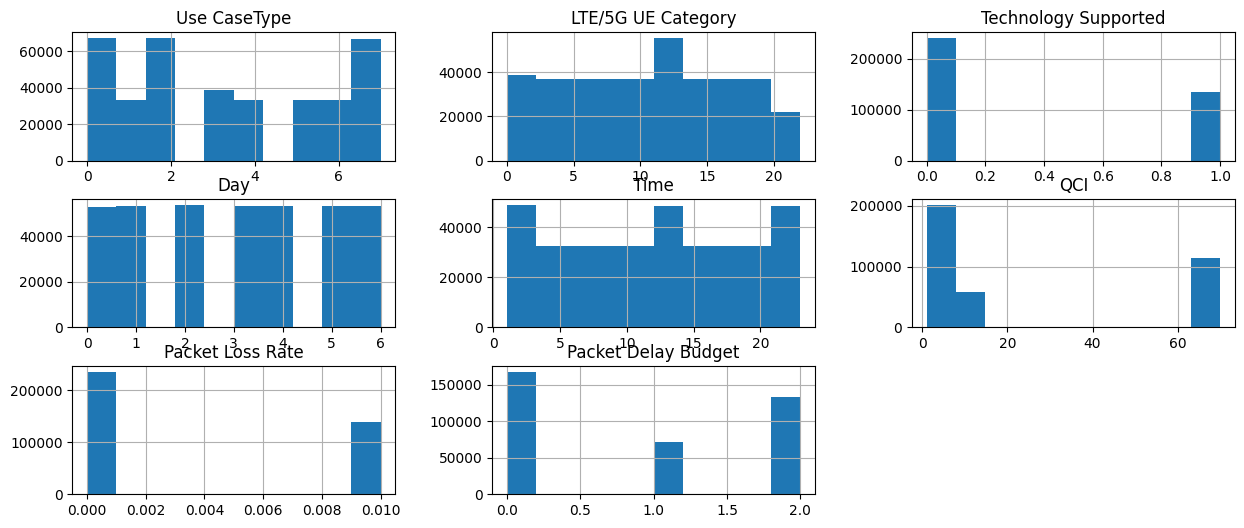

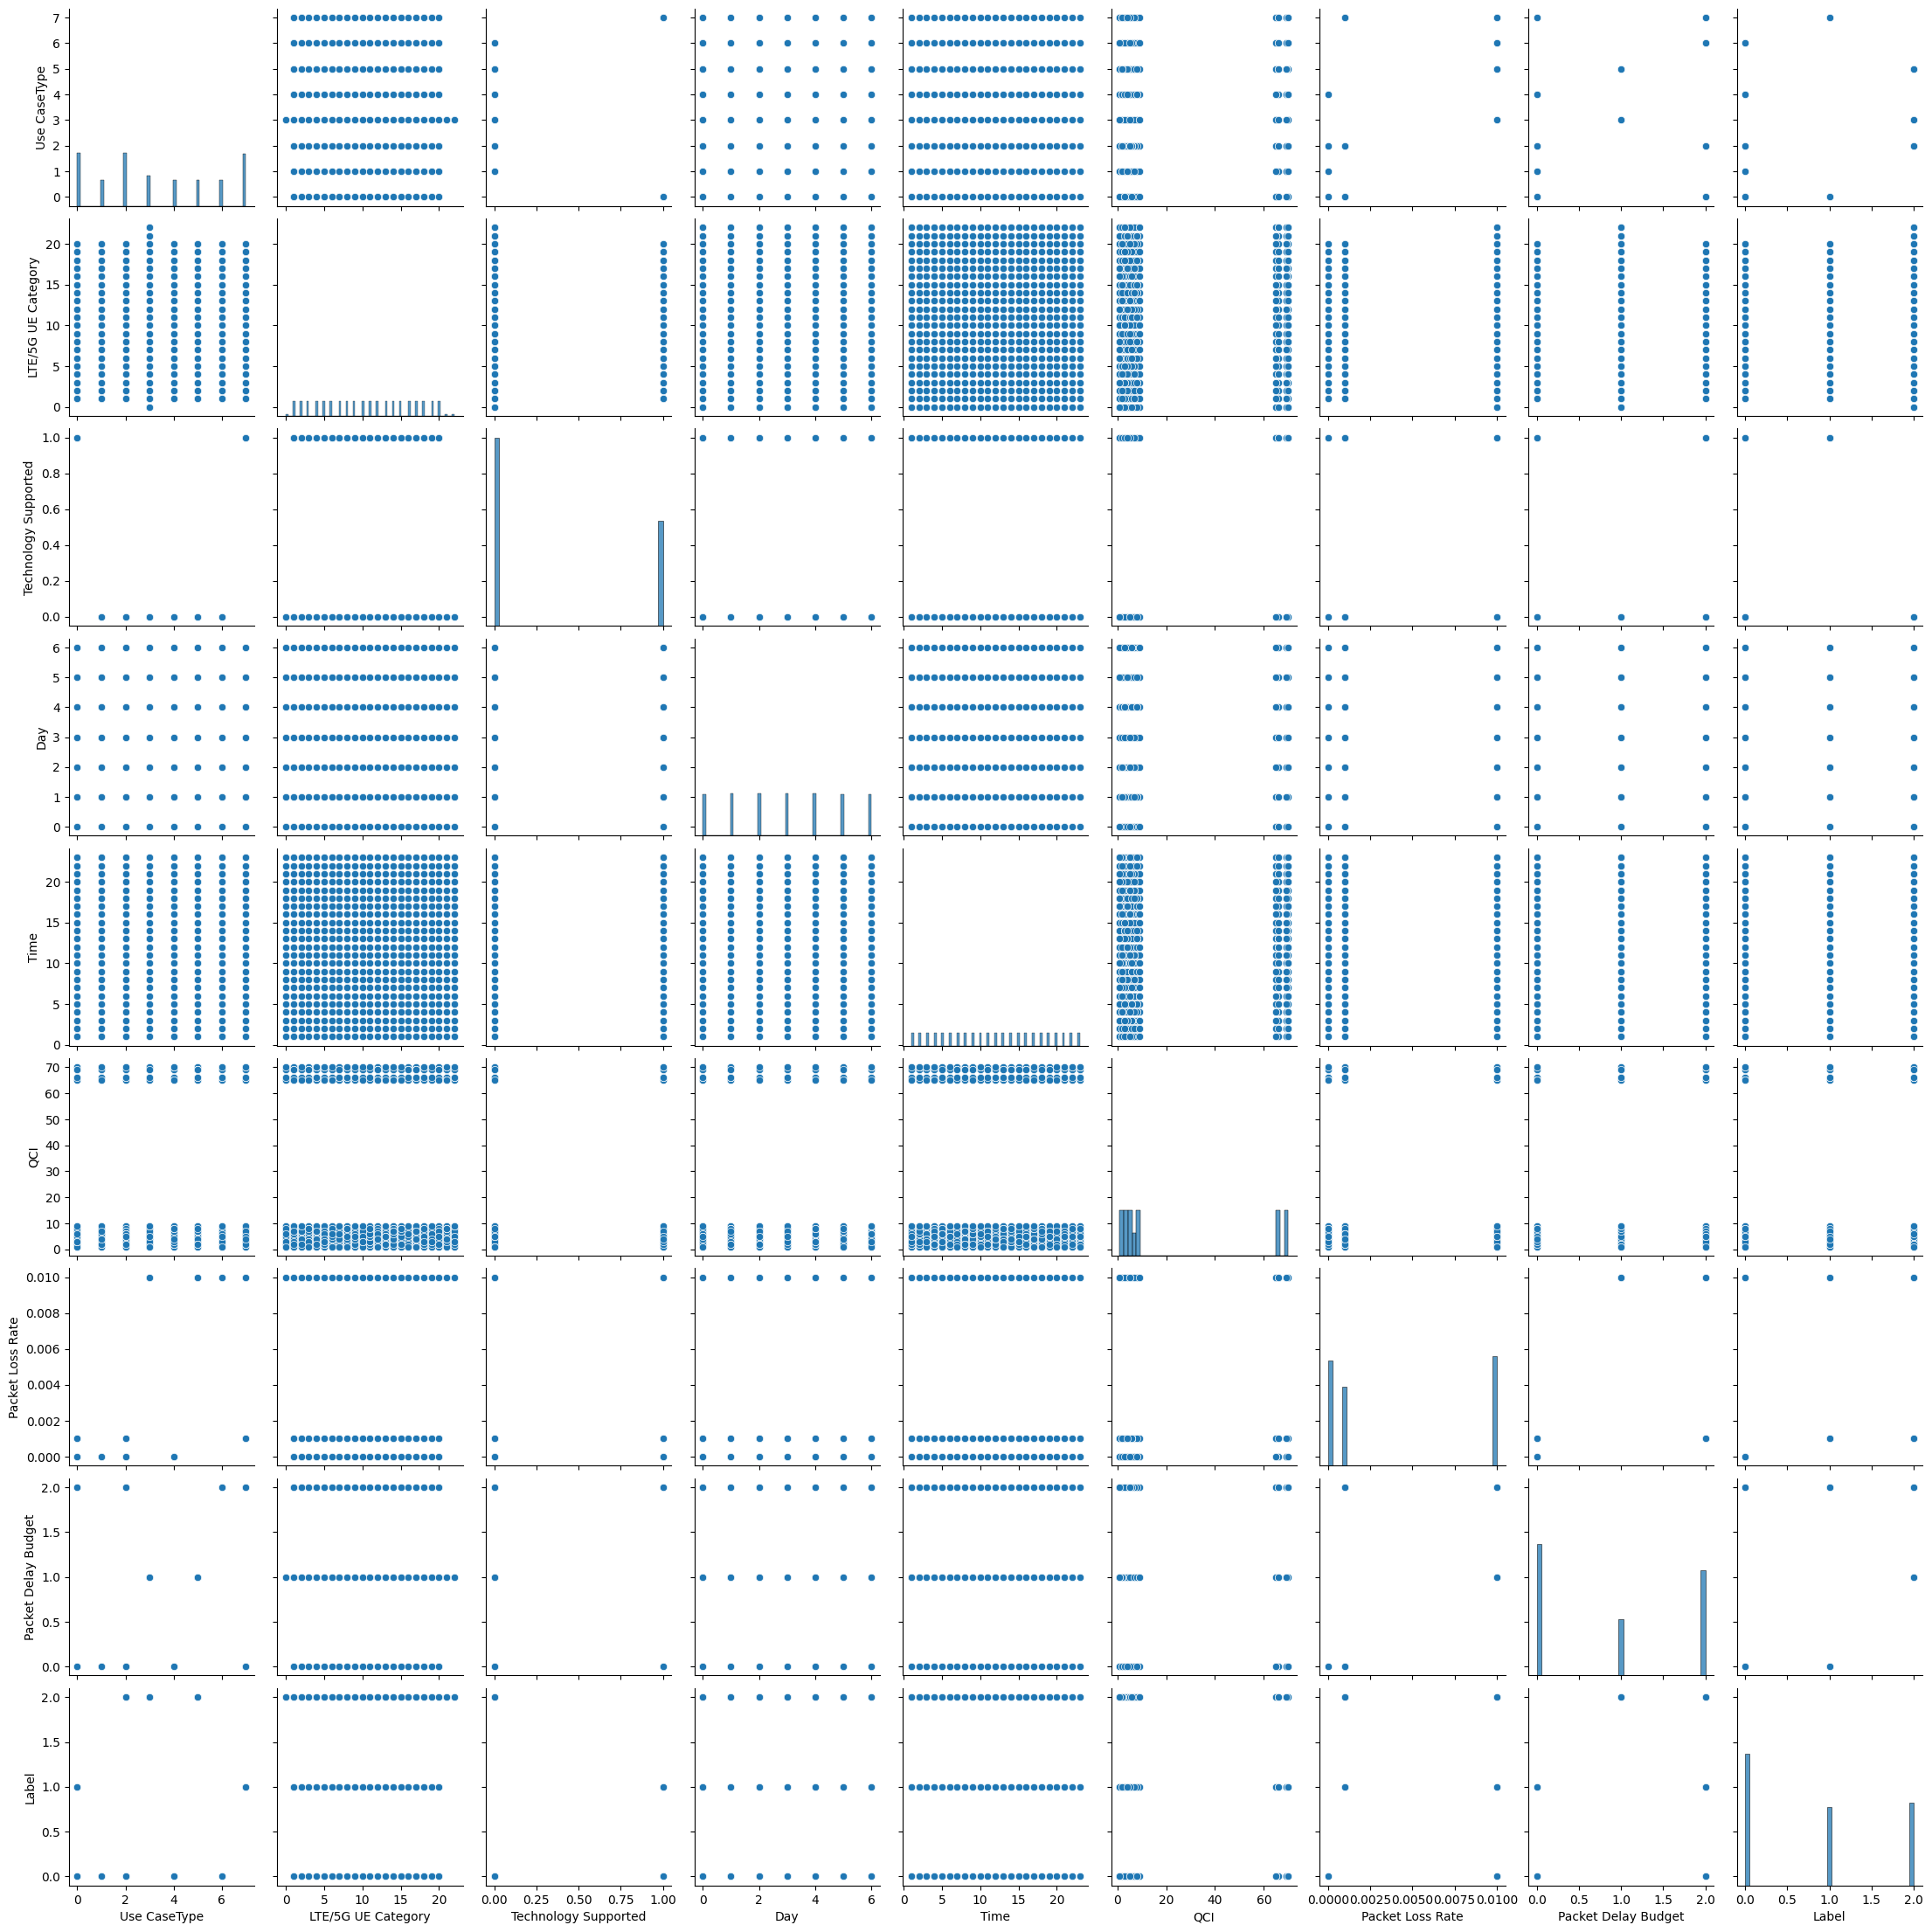

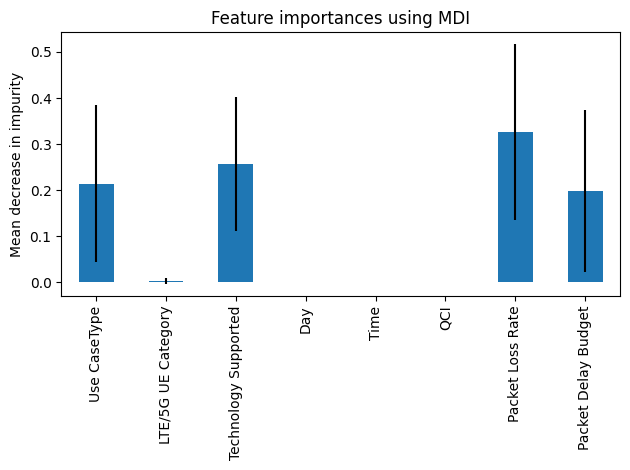

In [119]:
from utils import split_train_test, exploratory_analysis, encode_labels

X_train, X_test, y_train, y_test = split_train_test(df, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

In [120]:
from utils import scale_data
scaler, X_train, X_test = scale_data(X_train, X_test)

In [121]:
from utils import classify_random_forest
classify_random_forest(X_train, X_test, y_train_onehot, y_test_onehot)

Train Accuracy: 0.9103727727770621
Test Accuracy: 0.9100784162488752


In [122]:
from utils import classify_svm
classify_svm(X_train, X_test, y_train_onehot, y_test_onehot)

D:\git\github\ic\EXPLOR_network_slicing\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Accuracy: 1.0
Test Accuracy: 1.0




Describing pandas dataframe
                         count       mean        std       min       25%  \
LTE/5G UE Category    373391.0  10.551652   5.859729  0.000000  5.000000   
Technology Supported  373391.0   0.358678   0.479613  0.000000  0.000000   
Day                   373391.0   2.998950   1.997814  0.000000  1.000000   
Time                  373391.0  12.007860   6.634146  1.000000  6.000000   
QCI                   373391.0  24.228356  28.946700  1.000000  4.000000   
Packet Loss Rate      373391.0   0.003990   0.004643  0.000001  0.000001   
Packet Delay Budget   373391.0   0.910242   0.893928  0.000000  0.000000   

                         50%    75%    max  
LTE/5G UE Category    11.000  16.00  22.00  
Technology Supported   0.000   1.00   1.00  
Day                    3.000   5.00   6.00  
Time                  12.000  18.00  23.00  
QCI                    7.000  65.00  70.00  
Packet Loss Rate       0.001   0.01   0.01  
Packet Delay Budget    1.000   2.00   2.00  



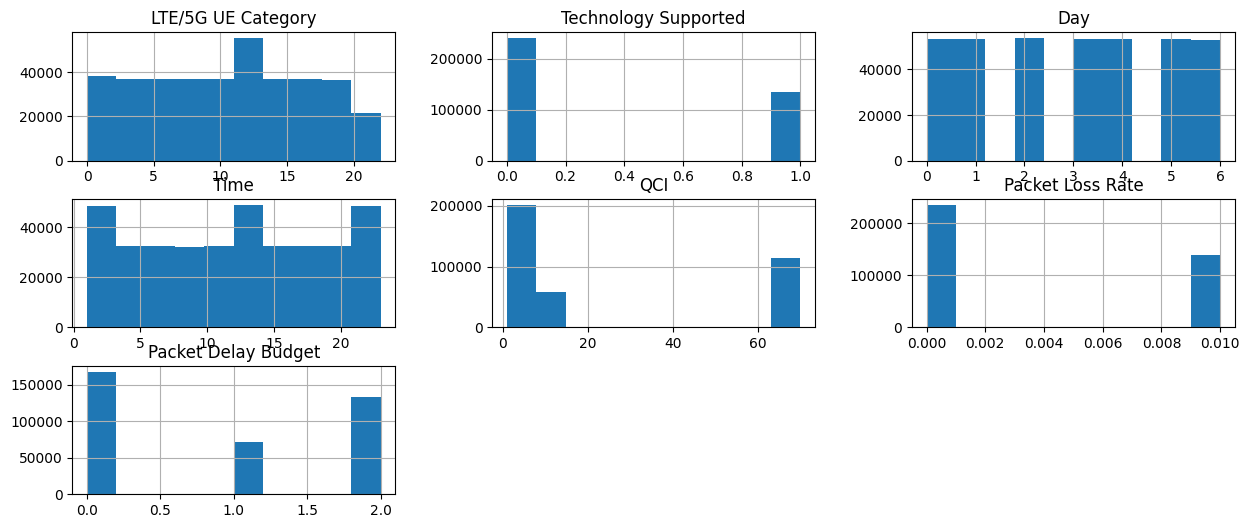

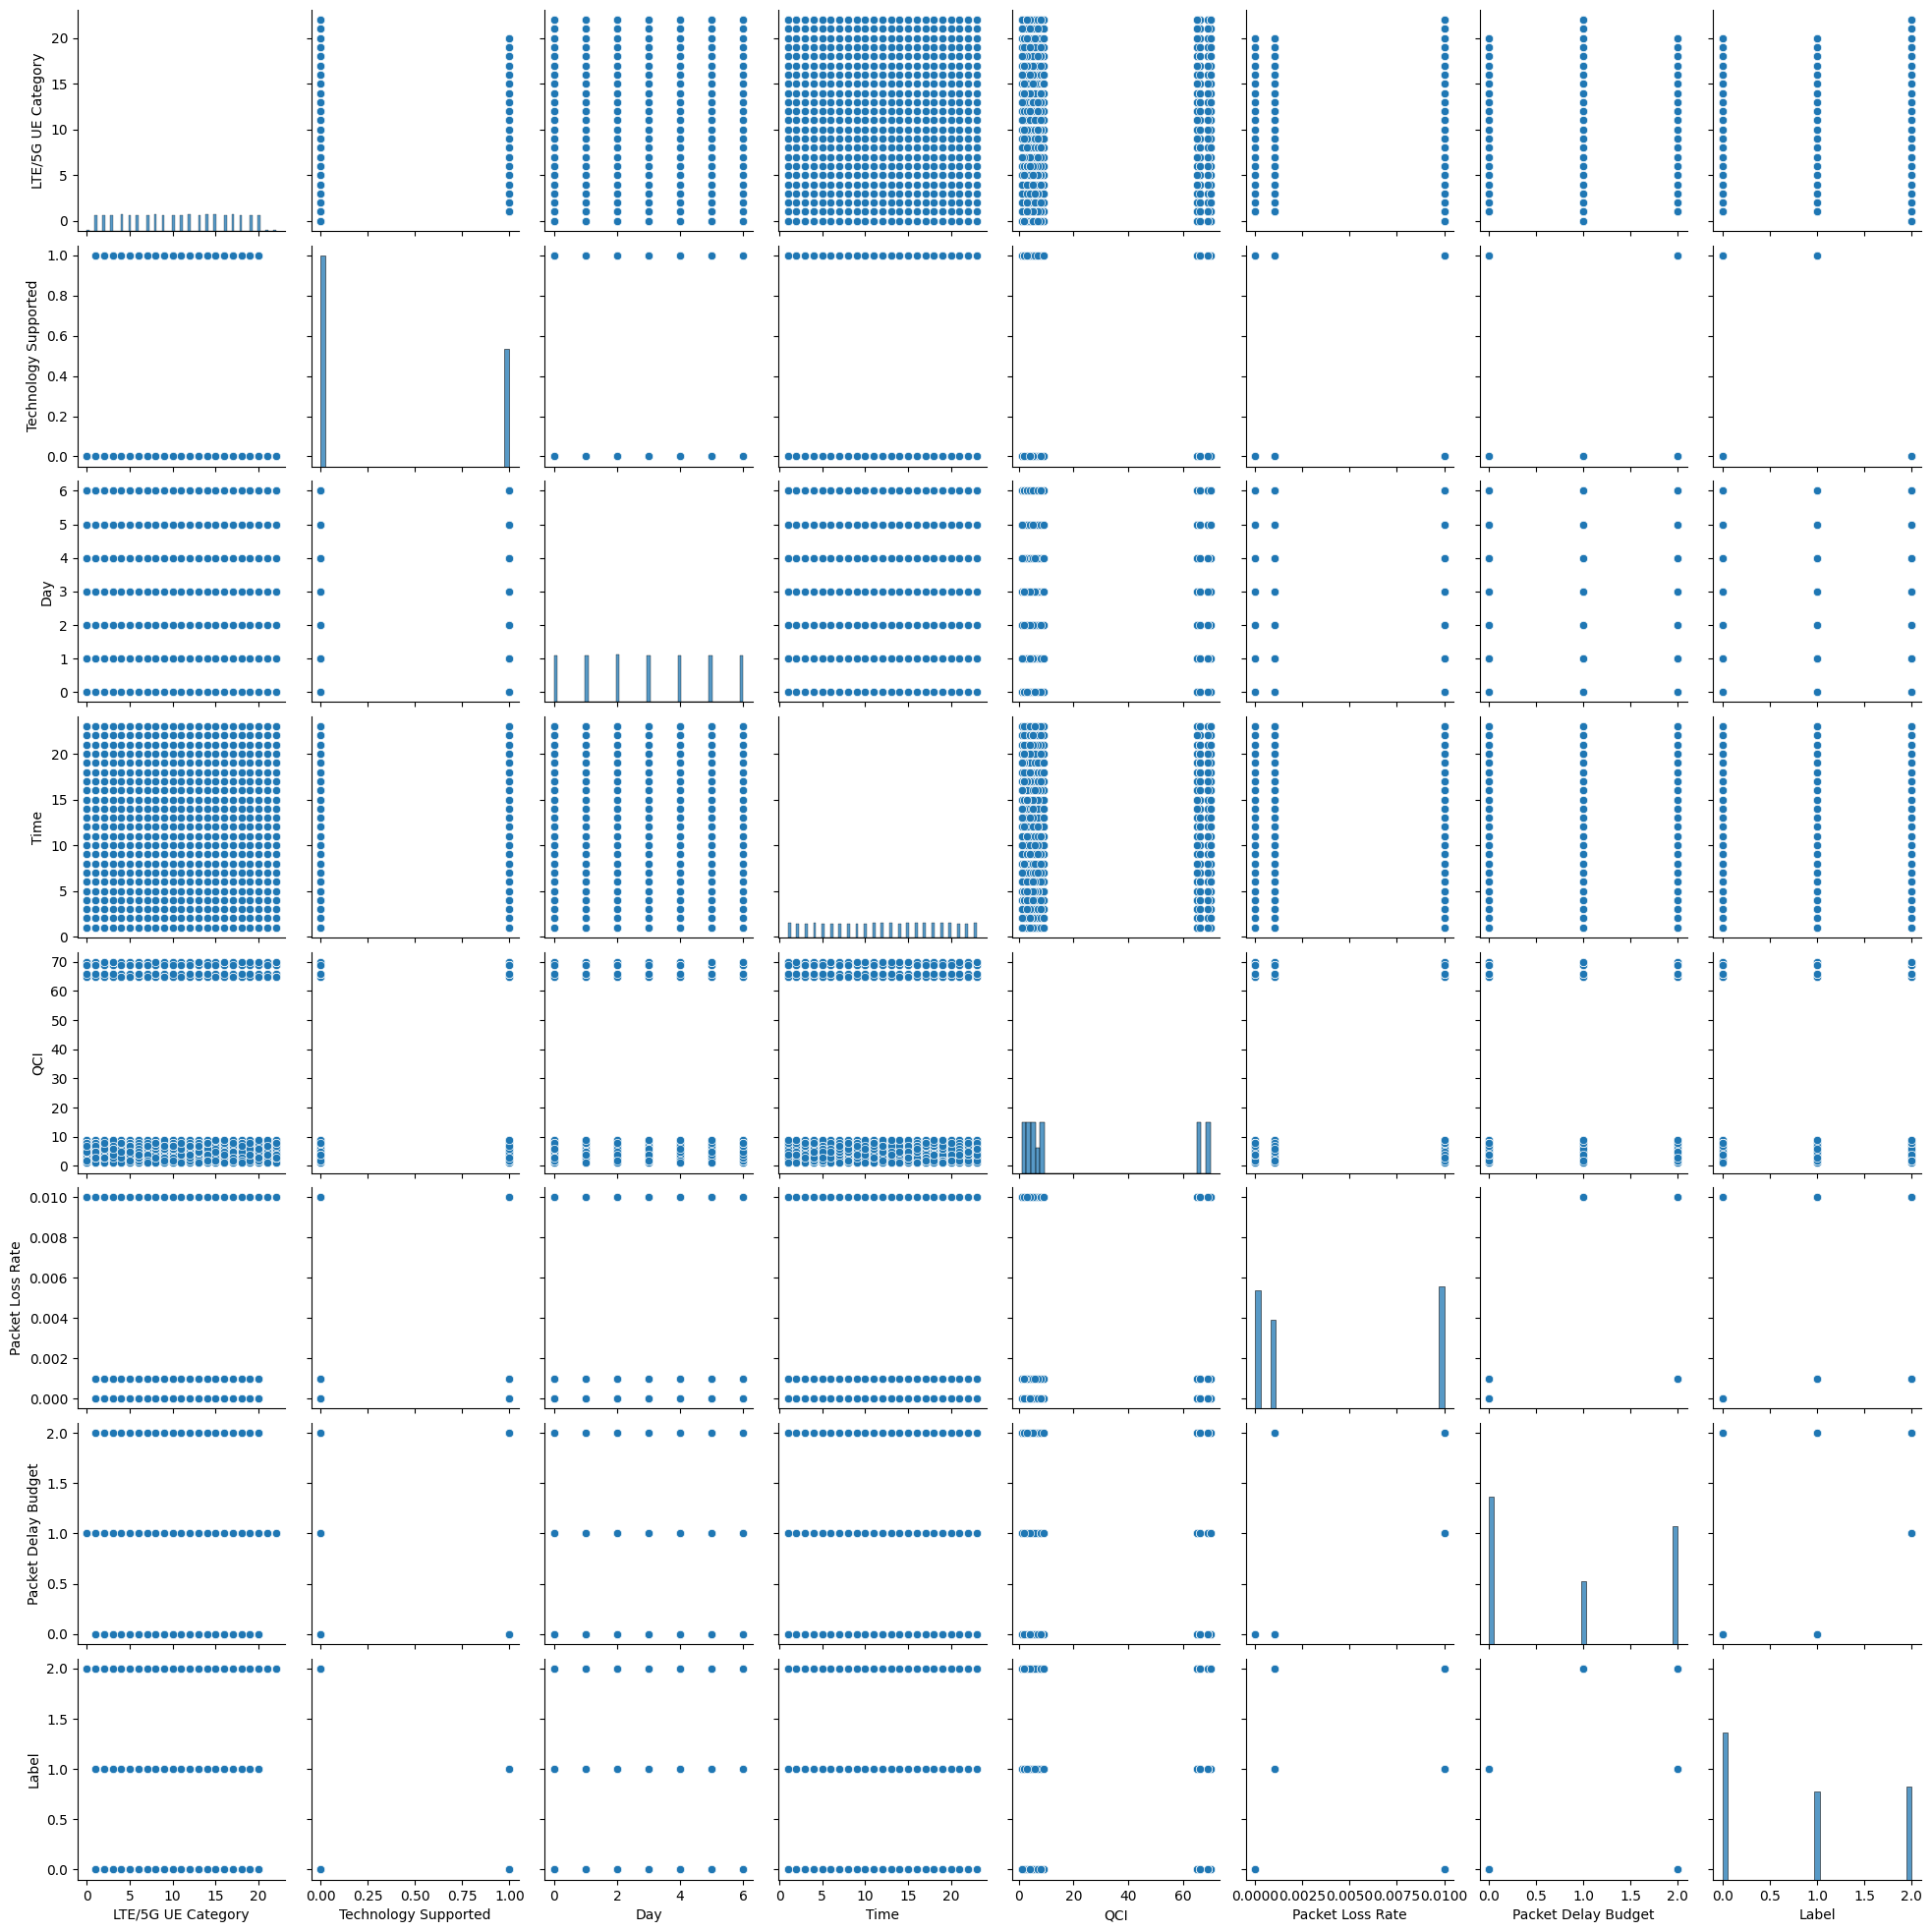

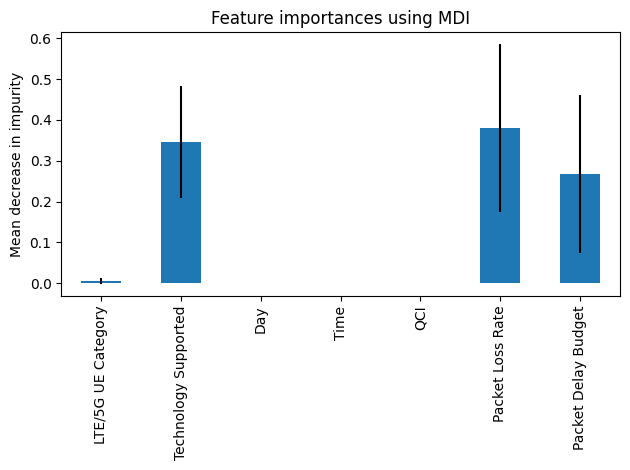

In [123]:
from utils import split_train_test, exploratory_analysis, encode_labels

df_new = df.copy()
df_new.drop(columns=["Use CaseType"], inplace=True)
X_train, X_test, y_train, y_test = split_train_test(df_new, target_col, test_size=0.2)
le, y_train_onehot, y_test_onehot = encode_labels(y_train, y_test)
exploratory_analysis(X_train, y_train_onehot)

In [124]:
from utils import classify_logistic
   
classify_logistic(X_train, X_test, y_train_onehot, y_test_onehot)

Train Accuracy: 0.7071729098987388
Test Accuracy: 0.7065818228564082


D:\git\github\ic\EXPLOR_network_slicing\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

def classify_GaussianNB(X_train, X_test, y_train_onehot, y_test_onehot):

    clf = GaussianNB().fit(X_train, y_train_onehot)

    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train_onehot, y_pred)
    print("Train Accuracy:", accuracy)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test_onehot, y_pred)
    print("Test Accuracy:", accuracy)
    
classify_GaussianNB(X_train, X_test, y_train_onehot, y_test_onehot)

Train Accuracy: 0.5515692665329374
Test Accuracy: 0.5515704674979646


In [126]:
X_train

,LTE/5G UE Category,Technology Supported,Day,Time,QCI,Packet Loss Rate,Packet Delay Budget
247858,19,0,6,23,1,0.000001,0
261356,5,0,3,3,65,0.000001,0
236095,13,0,2,15,3,0.000001,0
313174,10,0,0,10,65,0.010000,1
18423,9,1,2,15,3,0.010000,2
...,...,...,...,...,...,...,...
435568,6,0,1,18,4,0.000001,0
41017,20,1,0,5,3,0.010000,2
2324,2,1,1,18,9,0.010000,2
47078,3,0,4,11,66,0.010000,1


D:\git\github\ic\EXPLOR_network_slicing\venv\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167 (668.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.6041 - loss: 0.7589 - val_accuracy: 0.6416 - val_loss: 0.6782
Epoch 2/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.6422 - loss: 0.6785 - val_accuracy: 0.6453 - val_loss: 0.6777
Epoch 3/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6912 - loss: 0.5822 - val_accuracy: 0.9142 - val_loss: 0.2139
Epoch 4/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9101 - loss: 0.1748 - val_accuracy: 0.9130 - val_loss: 0.1664
Epoch 5/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9121 - loss: 0.1465 - val_accuracy: 0.9346 - val_loss: 0.1468
Epoch 6/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9234 - loss: 0.1332 - val_accuracy: 0.9229 - val_loss: 0.1206
Epoch 7/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9333 - loss: 0.1254 - val_accuracy: 0.9202 - val_loss: 0.1136
Epoch 8/10
11669/11669 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 

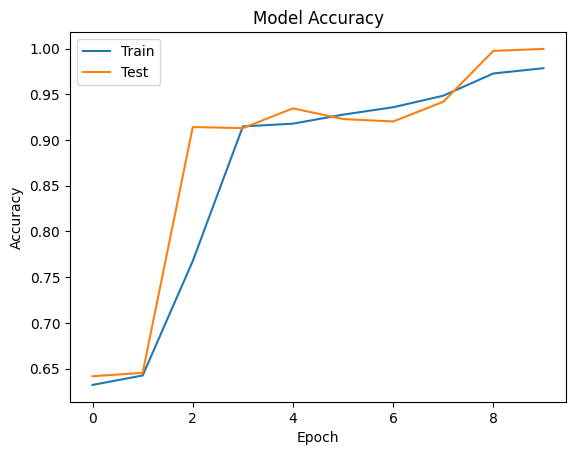

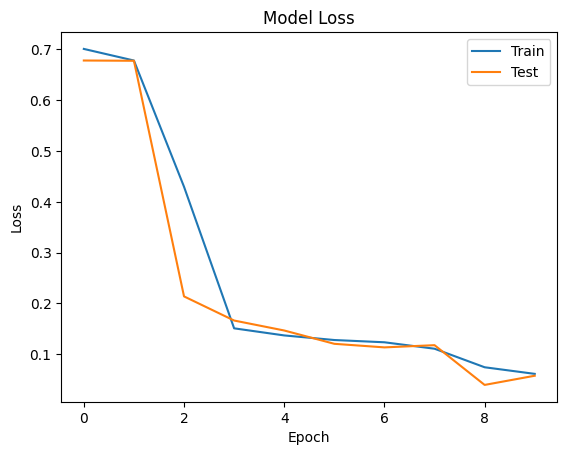

2918/2918 ━━━━━━━━━━━━━━━━━━━━ 2s 594us/step - accuracy: 0.9996 - loss: 0.0581

compile_metrics: 99.96%


In [127]:
from utils import classify_dnn

classify_dnn(X_train, X_test, y_train, y_test)